In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
import random

In [2]:
df = pd.read_csv('data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.index = df.timestamp
del df['tot_rate']
del df['timestamp']
df.columns = ['level', 'rain']
print df.shape
df = df[10000:50000]


(286272, 2)


In [3]:
df.head()

,level,rain
timestamp,,
2008-04-14 04:00:00,0.369,0.0
2008-04-14 04:15:00,0.368,0.0
2008-04-14 04:30:00,0.368,0.0
2008-04-14 04:45:00,0.367,0.0
2008-04-14 05:00:00,0.366,0.0


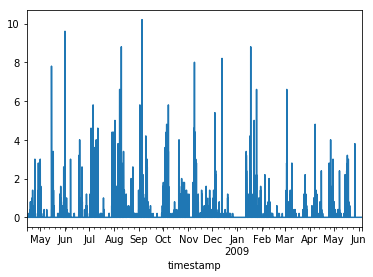

In [4]:
df.rain.plot()

# Define functions and constants for current model

In [5]:
def f(x):
    return math.exp(k * x)

def g(x):
    return (scale_m * x) + scale_a

def f_inv(x):
    return math.log(x) / k

def g_inv(x):
    return (x - scale_a) / scale_m

In [6]:
k = 0.07
scale_m = 1.943
scale_a = 0.263
delay = np.timedelta64(60, 'm') # 60 minutes


In [31]:

def model_H():
    df['storage'] = None
    df['time_since_update'] = None
    df['last_update'] = None
    storage = -30

    update = 0
    time_since_update = 0
    for i, r in df[5:].iterrows():
        if time_since_update >= update:
            recorded_level = df.loc[i, 'level']
            storage = f_inv(g_inv(recorded_level))
            predict = recorded_level
            update = random.randint(10,100)
            print i
            time_since_update = 0
        else:
            predict = g(f(storage))
            time_since_update = time_since_update + 1

        rain = df.loc[i - delay, 'rain']
        storage = storage + rain - f(storage)

        df.loc[i, 'storage'] = storage
        df.loc[i, 'predict'] = predict
        df.loc[i, 'time_since_update'] = time_since_update
        df.loc[i, 'last_update'] = recorded_level

        
model_H()

2008-04-14 05:15:00
2008-04-14 15:15:00
2008-04-15 00:00:00
2008-04-15 09:15:00
2008-04-16 05:00:00
2008-04-16 15:30:00
2008-04-17 00:15:00
2008-04-17 23:15:00
2008-04-18 18:45:00
2008-04-19 17:45:00
2008-04-20 05:45:00
2008-04-20 19:30:00
2008-04-21 00:30:00
2008-04-21 20:15:00
2008-04-22 05:45:00
2008-04-22 18:45:00
2008-04-23 04:00:00
2008-04-23 17:45:00
2008-04-24 16:45:00
2008-04-25 00:15:00
2008-04-25 23:15:00
2008-04-26 23:45:00
2008-04-27 04:15:00
2008-04-27 12:45:00
2008-04-27 17:15:00
2008-04-28 07:15:00
2008-04-28 10:30:00
2008-04-29 08:45:00
2008-04-29 23:15:00
2008-04-30 21:30:00
2008-05-01 01:45:00
2008-05-01 09:45:00
2008-05-01 19:15:00
2008-05-02 01:15:00
2008-05-02 06:45:00
2008-05-02 21:45:00
2008-05-03 11:45:00
2008-05-03 18:45:00
2008-05-04 00:30:00
2008-05-04 16:00:00
2008-05-05 02:30:00
2008-05-06 02:15:00
2008-05-06 21:30:00
2008-05-07 01:30:00
2008-05-07 09:00:00
2008-05-08 04:00:00
2008-05-08 17:30:00
2008-05-09 12:00:00
2008-05-09 15:00:00
2008-05-10 14:00:00


In [17]:
cost = ((df[6:].predict - df[6:].level) ** 2).sum() / df[6:].shape[0]

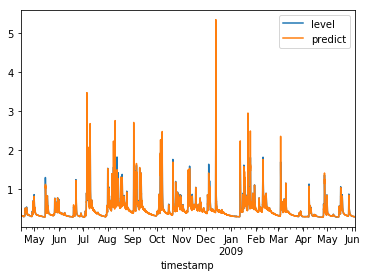

In [18]:
df[['level', 'predict']].plot()

In [19]:
tot = ((df[6:].level - df[6:].level.mean())**2).sum()
res = ((df[6:].predict - df[6:].level)**2).sum()
cost = ((df[6:].predict - df[6:].level) ** 2).sum() / df[6:].shape[0]
print 1 - (res/tot)
print cost

0.939693754889
0.00355330299698


In [20]:
# Backcalculate actual 'storage' values
df['storage_actual'] = df['level'].apply(lambda x: f_inv(g_inv(x)))

In [10]:
df.head(50)

,level,rain,storage,time_since_update,predict
timestamp,,,,,
2008-04-14 04:00:00,0.369,0.0,None,None,NaN
2008-04-14 04:15:00,0.368,0.0,None,None,NaN
2008-04-14 04:30:00,0.368,0.0,None,None,NaN
2008-04-14 04:45:00,0.367,0.0,None,None,NaN
2008-04-14 05:00:00,0.366,0.0,None,None,NaN
2008-04-14 05:15:00,0.366,0.0,-42.0139,0,0.366000
2008-04-14 05:30:00,0.365,0.0,-42.0667,1,0.365619
2008-04-14 05:45:00,0.364,0.0,-42.1193,2,0.365240
2008-04-14 06:00:00,0.364,0.0,-42.1717,3,0.364864


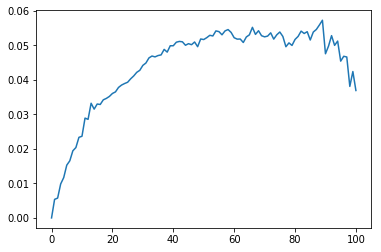

In [17]:
plt.plot((df[5:]['predict'] - df[5:]['level']).abs().groupby(df['time_since_update']).mean())

In [22]:
test['diff'] = test.storage_actual.diff().shift(-10)

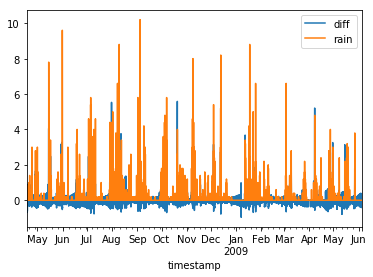

In [23]:
test[['diff', 'rain']][350:].plot()

In [24]:
test['est_diff'] = test['rain'] - test['storage_actual'].apply(lambda x: f(x))

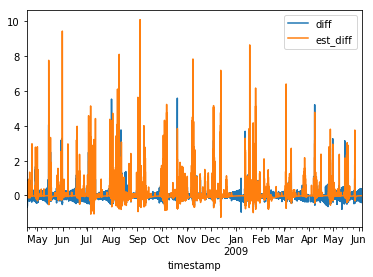

In [25]:
test[['diff', 'est_diff']][350:].plot()

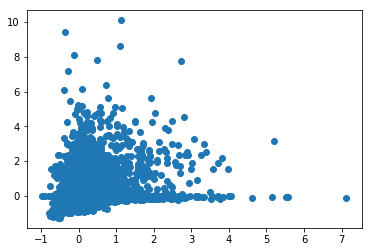

In [26]:
plt.scatter(test['diff'], test['est_diff'])

# Now a non-linear attempt -> not working better than linear regression

In [32]:
# 100 equates to roughly 24 hours
n_features = 2000
y_train = df.level[n_features:].values
y_train = np.reshape(y_train, (y_train.shape[0], 1)).astype('float32')

In [36]:
x_train = df[['rain', 'last_update', 'time_since_update']].copy()
for i in range(1, n_features):
    x_train['rain' + str(i)] = x_train['rain'].shift(i)
x_train = x_train[n_features:].values.astype('float32')

In [37]:
x_train.shape

(38000, 2002)

In [38]:
# Add bias terms...
n_training_samples = x_train.shape[0]
x_train = np.reshape(np.c_[np.ones(n_training_samples),x_train],[n_training_samples,n_features + 3])

In [39]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

In [40]:
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [41]:
def get_train_inputs():
    x = tf.constant(x_train)
    y = tf.constant(y_train)
    return x, y

In [42]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=n_features)]

estimator = tf.contrib.learn.DNNRegressor(
    feature_columns=feature_columns,
    hidden_units=[5, 5, 5, 5],
    optimizer=tf.train.ProximalAdagradOptimizer(
      learning_rate=0.01,
      l1_regularization_strength=0.001
    ))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x119a969d0>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}


In [43]:

estimator.fit(input_fn = get_train_inputs, steps=2000)


Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/7q/pngfcq3d32x6b9w1_0k_3rv40000gq/T/tmpWUyGnx/model.ckpt.
INFO:tensorflow:loss = 0.804674, step = 1


KeyboardInterrupt: 

In [878]:
predictions = np.array(list(estimator.predict(input_fn=input_fn_predict)))


Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
INFO:tensorflow:Restoring parameters from /var/folders/7q/pngfcq3d32x6b9w1_0k_3rv40000gq/T/tmpQ6OncX/model.ckpt-2000


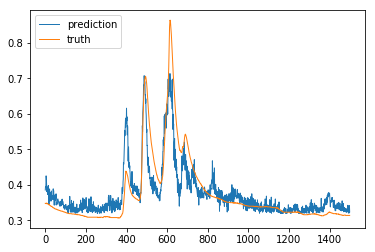

In [879]:
fig, ax = plt.subplots( nrows=1, ncols=1)  # create figure & 1 axis

#ax.plot(0.4 + df.rain.values[:1500]/10, linewidth=.5)

ax.plot(predictions[:1500],  label='prediction', linewidth=1)
ax.plot(y_train[:1500],  label='truth', linewidth=1)
plt.legend()
plt.savefig('foo.png')
plt.legend(loc='upper left')


In [880]:
explained_variance_score(y_train, predictions)

0.89003127813339233

In [ ]:
fig, ax = plt.subplots( nrows=1, ncols=1)  # create figure & 1 axis

#ax.plot(0.4 + df.rain.values[:1500]/10, linewidth=.5)

ax.plot(reg.predict(x_train)[:1500],  label='prediction', linewidth=1)
ax.plot(y_train[:1500],  label='truth', linewidth=1)
plt.legend()
plt.savefig('foo.png')
plt.legend(loc='upper left')